In [2]:
import torch
import IPython.display as ipd

In [3]:
# model_oldsr = torch.load('Final_Models/0513_230921ratio_sr32_d6_5db.model') 
# model_newsr = torch.load('Final_Models/0602_123426ratio_sr24_d6_5db.model')
# model_newNonSR = torch.load('0617_175014_24_d6_5db.model')
# # model_newprop = torch.load('Final_Models/0602_123426ratio_sr24_d6_5db.model')
# # model_newbase = torch.load('0606_214529_baseline_sr32_d3_5db.model')

In [10]:
def load_trim(wavpath, n, db=0, overlap=64):
    
    window = np.hamming(overlap*2) 
    window = np.concatenate((window[:overlap],np.ones(512-overlap*2),window[overlap:]))
    window = window.reshape(1,-1)
    window = window.astype(np.float32)
    
    try:
        c, cr = librosa.load(wavpath, sr = None)
        c /= np.std(c)
    except OSError:
        print('errorfile:',wavpath)
    
    n = n[len(n)//2:len(n)//2+len(c)]
    if db == 0:
        n = n/np.std(n)
    else:
        n = n/(np.std(n)*2)
    n /= max(abs(c))
    c /= max(abs(c))
    x = c + n
    
    c_l = []
    x_l = []
    
    for i in range(0, len(c), 512 - overlap):
        if i + 512 > len(c):
            break
        c_l.append(c[i:i+512])
        x_l.append(x[i:i+512])
    c_l = np.array(c_l)
    x_l = np.array(x_l)
    c = c[:len(c_l)*(512-overlap)+overlap]
    x = x[:len(c)]
    
    c_l = c_l * window
    x_l = x_l * window

    return c_l, c, x_l, x


def rebuild(output, overlap = 64):
    output = output.cpu()
    len_wav = len(output) * (512 - overlap) + overlap
    wave = torch.zeros(len_wav)
    for i in range(len(output)):
        wave[i*(512-overlap):i*(512-overlap)+512] += output[i]       
    
    return wave

def SDR(s, sr): # input (50, 512), (50, 512)
    
    eps=1e-20
    s = s.cpu().data.numpy()
    sr = sr.cpu().data.numpy()
    sdr = 10*np.log10(np.sum(s**2)/(np.sum((s-sr)**2)+eps)+eps)
    
    return sdr

def SISDR(s,sr,  cuda = False):
    
    eps = 1e-20
    scale = torch.sum(sr * s, dim = 1) / torch.sum(s**2, dim = 1) 
    scale = scale.unsqueeze(dim = 1) # shape - [50,1]
    s = s * scale
    sisdr = torch.mean(10*torch.log10(torch.sum(s**2, dim = 1)/(torch.sum((s-sr)**2, dim=1)+eps)+eps))
    if cuda:
        return torch.mean(sisdr)
    else:
        return torch.mean(sisdr).cpu().data.numpy()
    
import collections
def entropy(arg):
    entropy = 0
    counter = collections.Counter(arg)
    sum_v = sum(counter.values())
    for value in counter.values():
        p = value / sum_v
        entropy += - np.log(p)*p
    return entropy


In [11]:
import IPython.display
import matplotlib.pyplot as plt
import librosa
import numpy as np

wavpath0 = '/media/sdc1/Data/timit-wav/test/dr5/mrws1/sx140.wav'
wavpath1 = '/media/sdc1/Data/timit-wav/test/dr1/faks0/sa1.wav'
wavpath2 = '/media/sdc1/Data/timit-wav/test/dr1/mreb0/sa2.wav'
wavpath3 = '/media/sdc1/Data/timit-wav/test/dr3/mkch0/sx28.wav'
wavpath4 = '/media/sdc1/Data/timit-wav/test/dr3/fkms0/sx50.wav'
wavpath5 = '/media/sdc1/Data/timit-wav/test/dr5/fjcs0/sx139.wav'
wavpath6 = '/media/sdc1/Data/timit-wav/test/dr4/fsem0/sx28.wav'
wavpath7 = '/media/sdc1/Data/timit-wav/test/dr4/mkcl0/sx191.wav'
wavpath8 = '/media/sdc1/Data/timit-wav/test/dr6/flnh0/sx134.wav'
wavpath9 = '/media/sdc1/Data/timit-wav/test/dr6/mesd0/sx12.wav'

path_name = [wavpath0, wavpath1, wavpath2,wavpath3,wavpath4,wavpath5,wavpath6,wavpath7,wavpath8,wavpath9]
# n_idx = [2, -1, -3, -4, 5, 1]

# idx = 4
names = ['birds', 'computerkeyboard', 'jungle', 'ocean', 'casino', 'eatingchips', 'machineguns',\
                 'cicadas', 'frogs', 'motorcycles']
i = 1
path = path_name[i]
noise_path = '/media/sdc1/Data/Duan/{}.wav'.format(names[i])
n, nr = librosa.load(noise_path, sr=None)
# tes, sr = librosa.load(wavpath5, sr=None)

db = 5
c_l, c, x_l, x = load_trim(path, n, db=db)

c_l = torch.Tensor(c_l)
c = torch.Tensor(c)
x_l = torch.Tensor(x_l)
#         x = torch.Tensor(x)


In [12]:
def gen_sound(i=0,db=0):
    wavpath0 = '/media/sdc1/Data/timit-wav/test/dr5/mrws1/sx140.wav'
    wavpath1 = '/media/sdc1/Data/timit-wav/test/dr1/faks0/sa1.wav'
    wavpath2 = '/media/sdc1/Data/timit-wav/test/dr1/mreb0/sa2.wav'
    wavpath3 = '/media/sdc1/Data/timit-wav/test/dr3/mkch0/sx28.wav'
    wavpath4 = '/media/sdc1/Data/timit-wav/test/dr3/fkms0/sx50.wav'
    wavpath5 = '/media/sdc1/Data/timit-wav/test/dr5/fjcs0/sx139.wav'
    wavpath6 = '/media/sdc1/Data/timit-wav/test/dr4/fsem0/sx28.wav'
    wavpath7 = '/media/sdc1/Data/timit-wav/test/dr4/mkcl0/sx191.wav'
    wavpath8 = '/media/sdc1/Data/timit-wav/test/dr6/flnh0/sx134.wav'
    wavpath9 = '/media/sdc1/Data/timit-wav/test/dr6/mesd0/sx12.wav'

    path_name = [wavpath0, wavpath1, wavpath2,wavpath3,wavpath4,wavpath5,wavpath6,wavpath7,wavpath8,wavpath9]
    # n_idx = [2, -1, -3, -4, 5, 1]

    # idx = 4
    names = ['birds', 'computerkeyboard', 'jungle', 'ocean', 'casino', 'eatingchips', 'machineguns',\
                     'cicadas', 'frogs', 'motorcycles']
#     i = 1
    path = path_name[i]
    noise_path = '/media/sdc1/Data/Duan/{}.wav'.format(names[i])
    n, nr = librosa.load(noise_path, sr=None)
    # tes, sr = librosa.load(wavpath5, sr=None)

#     db = 5
    c_l, c, x_l, x = load_trim(path, n, db=db)

    c_l = torch.Tensor(c_l)
#     c = torch.Tensor(c)
    x_l = torch.Tensor(x_l)
    #         x = torch.Tensor(x)
    
    return c,x

In [13]:
import soundfile as sf
for i in range(0,1):
    for db in [0]:
        c,x = gen_sound(i, db)
        path = '../testuttr/uttr{}_{}db_new2'.format(str(i),str(db))
        sf.write(path+'_mix.wav', x/max(x), 16000, 'PCM_16')
#         librosa.output.write_wav(path+'_mix.wav', x, sr = 16000)
    path = '../testuttr/uttr{}_new2'.format(str(i))
#     librosa.output.write_wav(path+'_clean.wav', c, sr = 16000)
    sf.write(path+'_clean.wav', c/max(c), 16000, 'PCM_16')
        

In [21]:
x,sr = librosa.load('../testuttr/uttr0_new2_clean.wav', sr = 16000)

In [24]:
x

array([-0.00588067,  0.        , -0.00196022, ...,  0.00588067,
        0.00392045,  0.00392045], dtype=float32)

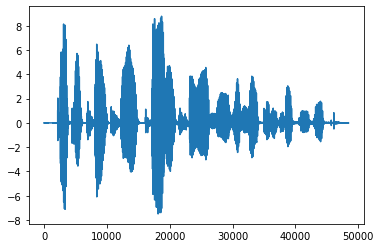

In [23]:
plt.plot(x)

In [39]:
ipd.Audio('testuttr/uttr0_0db_mix.wav',rate=16000)

In [33]:
ipd.Audio(x, rate = 16000)

In [5]:
def generate_result(model, x_l):
    model.eval()
    s_h, n_h, prob_s, prob_n = model(x_l.cuda(),soft = False)
    rx = rebuild(s_h+n_h).cpu().data.numpy()
    rs = rebuild(s_h).cpu().data.numpy()
    
    return rs, rx

**Old SR**

In [6]:
rs, rx = generate_result(model_oldsr, x_l)
ipd.Audio(rx/max(rx), rate = 16000)

In [7]:
ipd.Audio(rs/max(rs), rate = 16000)

**New sr**

In [8]:
rs, rx = generate_result(model_newsr, x_l)
ipd.Audio(rx/max(rx), rate = 16000)

In [9]:
ipd.Audio(rs/max(rs), rate = 16000)

**New nonSR**

In [10]:
rs, rx = generate_result(model_newNonSR, x_l)
ipd.Audio(rx/max(rx), rate = 16000)

In [11]:
ipd.Audio(rs/max(rs), rate = 16000)